# Coding Exercises (Part 2)

## Full Data Workflow A-Z: Data Preparation and Feature Creation

### Exercise 15: Data Preparation and Feature Creation

Now, you will have the opportunity to analyze your own dataset. <br>
__Follow the instructions__ and insert your code! You are either requested to 
- Complete the Code and __Fill in the gaps__. Gaps are marked with "__---__" and are __placeholders__ for your code fragment. 
- Write Code completely __on your own__ 

In some exercises, you will find questions that can only be answered, if your code is correct and returns the right output! The correct answer is provided below your coding cell. There you can check whether your code is correct.

If you need a hint, check the __Hints Section__ at the end of this Notebook. Exercises and Hints are numerated accordingly.

If you need some further help or if you want to check your code, you can also check the __solutions notebook__.

### Have Fun!

--------------------------------------------------------------------------------------------------------------

## Option 1: Self_guided

132. Import and inspect the cars dataset (cars.csv)!

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
cars = pd.read_csv('cars.csv')

133. __Transform__ the format in the model_year column to __full year format__ (e.g. 1970 instead of 70)!

In [9]:
cars.model_year = cars.model_year.add(1900)

In [10]:
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,1970,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,1970,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,1970,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,1970,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,1970,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,1982,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,1982,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,1982,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,1982,usa,ford ranger


134. __Transform__ the __mpg__ column in way that the relationship with the horsepower feature is __linear__/closer to linear!<br> __Visualize__ before and after!<br> <br>
(Hint: Gallons per 100 miles might be a good format) 

Text(0, 0.5, 'mpg')

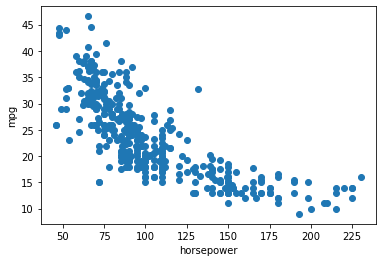

In [21]:
plt.scatter(cars.horsepower,cars.mpg)
plt.xlabel('horsepower')
plt.ylabel('mpg')

Text(0, 0.5, 'horsepower')

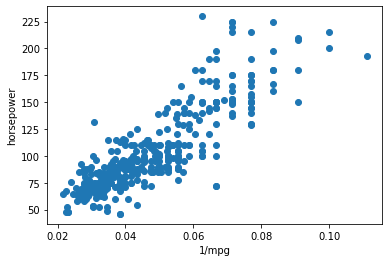

In [23]:
plt.scatter(1/cars.mpg,cars.horsepower)
plt.xlabel('1/mpg')
plt.ylabel('horsepower')

135. Create a __new column__ with the __manufacturer__ name!

In [35]:
cars.name.str.split(n= 1,expand = True)

,0,1
0,chevrolet,chevelle malibu
1,buick,skylark 320
2,plymouth,satellite
3,amc,rebel sst
4,ford,torino
...,...,...
393,ford,mustang gl
394,vw,pickup
395,dodge,rampage
396,ford,ranger


In [37]:
cars['manufacturer'] = cars.name.str.split(n= 1,expand = True)[0]

136. Add a __new column__ with the respective __continent__ (north america, asia, europe)!

In [40]:
cars['continent'] = cars.origin.map({'usa':'north america','japan':'asia','europe':'europe'})

In [42]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,manufacturer,continent
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet,north america
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick,north america
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth,north america
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc,north america
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford,north america


137. __Visualize__ and inspect whether there are any __extreme values__ / outliers in the __numerical columns__ that are worth to be __capped__ / __floored__!

In [43]:
cars.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

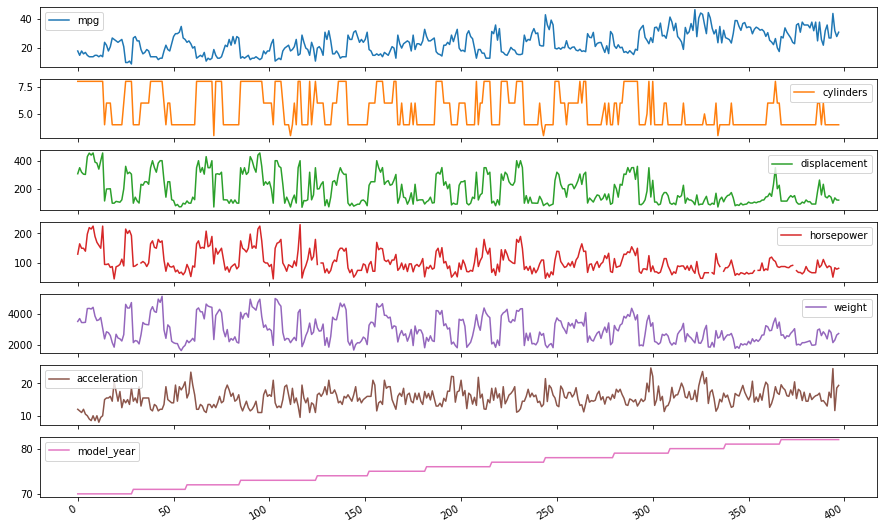

In [48]:
cars.plot(subplots=True,figsize= (15,10))

138. __Bin / discretize__ the __weight__ column! The __25%__ of cars with the __lowest weight__ shall get the label __"light"__, the __25%__ of cars with the __highest weight__ shall get the label __"heavy"__ and the remaining __50%__ the label __"medium"__! Create a new column __"weight_cat"__!

In [52]:
labels = ['light','medium','highest weight']
pd.qcut(cars.weight,[0,0.25,0.75,1],labels=labels)

0              medium
1      highest weight
2              medium
3              medium
4              medium
            ...      
393            medium
394             light
395            medium
396            medium
397            medium
Name: weight, Length: 398, dtype: category
Categories (3, object): [light < medium < highest weight]

In [53]:
cars['weight_cat'] = pd.qcut(cars.weight,[0,0.25,0.75,1],labels=labels)

In [55]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,manufacturer,continent,weight_cat
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet,north america,medium
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick,north america,highest weight
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth,north america,medium
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc,north america,medium
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford,north america,medium


139. __Drop__ the columns "cylinders", "displacement", "weight", "acceleration", "name", "mpg"!

In [56]:
cars.drop(['cylinders','displacement','weight','acceleration','name','mpg'],axis=1)

,horsepower,model_year,origin,manufacturer,continent,weight_cat
0,130.0,70,usa,chevrolet,north america,medium
1,165.0,70,usa,buick,north america,highest weight
2,150.0,70,usa,plymouth,north america,medium
3,150.0,70,usa,amc,north america,medium
4,140.0,70,usa,ford,north america,medium
...,...,...,...,...,...,...
393,86.0,82,usa,ford,north america,medium
394,52.0,82,europe,vw,europe,light
395,84.0,82,usa,dodge,north america,medium
396,79.0,82,usa,ford,north america,medium


140. Bring the columns __horsepower__ and the column that you created in __question 133__ (transformed mpg column) to the same __scale__ by calculating __z-scores__! __Visualize__ before and after!

<AxesSubplot:>

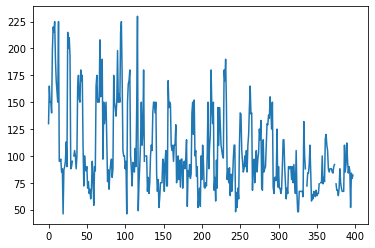

In [64]:
cars.horsepower.plot()

In [59]:
hrs_mean = cars.horsepower.mean()
hrs_std = cars.horsepower.std()

In [62]:
cars['horsepower_norm'] = (cars.horsepower-hrs_mean)/hrs_std

In [ ]:
cars

<AxesSubplot:>

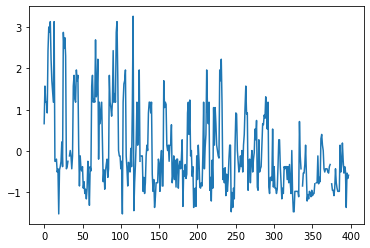

In [63]:
cars.horsepower_norm.plot()

141. __Transform__ the columns __model_year__ and __origin__ into (k-1) columns with __dummy variables__!

In [57]:
pd.get_dummies(cars.model_year)

,70,71,72,73,74,75,76,77,78,79,80,81,82
0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0,0,0,0,0,0,0,0,0,0,0,0,1
394,0,0,0,0,0,0,0,0,0,0,0,0,1
395,0,0,0,0,0,0,0,0,0,0,0,0,1
396,0,0,0,0,0,0,0,0,0,0,0,0,1


In [58]:
pd.get_dummies(cars.origin)

,europe,japan,usa
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
393,0,0,1
394,1,0,0
395,0,0,1
396,0,0,1


-----------------------------------------------------------------------------

## Option 2: Guided and Instructed

### No further guidance this time! Prepare yourself for the final challenge! (Take a look at the Hints, if necessary)

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

----------------------------

## Hints (Spoiler!)

132. At this point, you should know this!

133. Use the add() method.

134. 1/mpg * 100

135. string method split()

136. Pass a mapper/dictionary to the map() method

137. Lineplot for all columns. Hint: Nothing to cap / floor

138. pd.qcut()

139. drop() method

140. z-score for all elements in horsepower column: z-score = (cars.horsepower - cars.horsepower.mean()) / cars.horsepower.std()

141. pd.get_dummies(); drop_first = True